In [1]:
# basic libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import mhd_numerical_diff as mhdmod
import traj_utilities as tju
import matplotlib.pyplot as plt
import h5py as h5

In [2]:
model_brio01 = mhdmod.MHD_nd(gamma=2.,nh=48, nlayers=4, model_name='dummy',do_visc=True,visc=0.01, dx=0.001, dt=0.001)
model_brio01.load_weights("../brio_wu_models/4_traj_para_visc01/best_weights/weights")

model_brio005 = mhdmod.MHD_nd(gamma=2.,nh=48, nlayers=4, model_name='dummy',do_visc=True,visc=0.005, dx=0.001, dt=0.001)
model_brio005.load_weights("../brio_wu_models/4_traj_para_visc005/best_weights/weights")

In [3]:
fname = '../brio_wu_spacetime/briowu_ST.h5'
space,time,sc_1,sc_2,sc_3,sc_4,st_data,st_input, data_input = tju.load_sp_mhd_data(fname, 'briowu', parallel=True)

In [4]:
# define grid(s) for reproducing results

# for comparison with full simulation
xx,tt = np.meshgrid(space,time,indexing='ij')
xxtt = np.stack((xx.flatten(), tt.flatten())).T #returns (Np, 2) for input into PINN

nx = len(space)
nt = len(time)

#lower res grid
nx_samp = 101
nt_samp = 101
sptim_lin = mhdmod.generate_spacetime_coloc_linear([[space[0],space[-1]]],[time[0],time[-1]],nx_samp,nt_samp).numpy()

In [5]:
#generate predictions
pred_brio01 = model_brio01(xxtt)
pred_brio01_lin = model_brio01(sptim_lin)
pred_rho01 = pred_brio01[:,0].numpy().reshape(nx,nt)
pred_vx01 = pred_brio01[:,1].numpy().reshape(nx,nt)
pred_vy01 = pred_brio01[:,2].numpy().reshape(nx,nt)
pred_p01 = pred_brio01[:,4].numpy().reshape(nx,nt)
pred_by01 = pred_brio01[:,6].numpy().reshape(nx,nt)

pred_brio005 = model_brio005(xxtt)
pred_brio005_lin = model_brio005(sptim_lin)
pred_rho005 = pred_brio005[:,0].numpy().reshape(nx,nt)
pred_vx005 = pred_brio005[:,1].numpy().reshape(nx,nt)
pred_vy005 = pred_brio005[:,2].numpy().reshape(nx,nt)
pred_p005 = pred_brio005[:,4].numpy().reshape(nx,nt)
pred_by005 = pred_brio005[:,6].numpy().reshape(nx,nt)

In [6]:
error_rho_rel_01 = np.abs((pred_rho01 - st_data[0])/st_data[0])
error_rho_rel_005 = np.abs((pred_rho005 - st_data[0])/st_data[0])

error_vx_abs_01 = np.abs((pred_vx01 - st_data[1]))
error_vx_abs_005 = np.abs((pred_vx005 - st_data[1]))

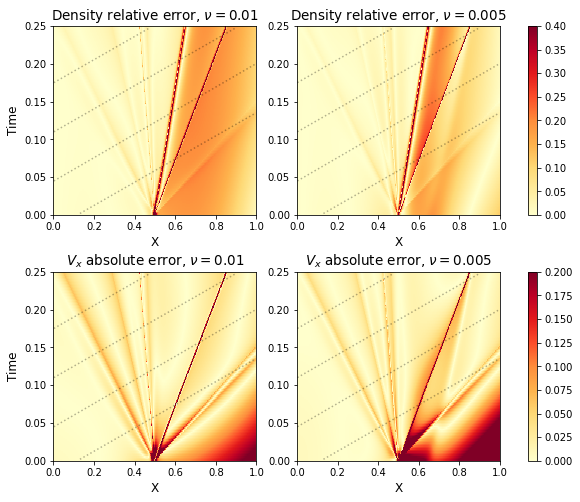

In [7]:
fig = plt.figure()

ax = fig.add_subplot(221)
#This figure is a plot of the relative error of density
ax.pcolormesh(space,time,error_rho_rel_01.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Time", fontsize=12)
ax.set_title("Density relative error, $\\nu=0.01$",fontsize=13.5)

ax2 = fig.add_subplot(222)
#This figure is a plot of the relative error of density
img = ax2.pcolormesh(space,time,error_rho_rel_005.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax2.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax2.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax2.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax2.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X", fontsize=12)
ax2.set_title("Density relative error, $\\nu=0.005$",fontsize=13.5)
#ax2.set_ylabel("Time", fontsize=12)

ax3 = fig.add_subplot(223)
#This figure is a plot of the absolute error of Vx
ax3.pcolormesh(space,time,error_vx_abs_01.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.2, shading='auto')
ax3.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax3.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax3.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax3.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax3.set_xlim(0.,1.)
ax3.set_ylim(0.,0.25)
ax3.set_xlabel("X", fontsize=12)
ax3.set_ylabel("Time", fontsize=12)
ax3.set_title("$V_x$ absolute error, $\\nu=0.01$",fontsize=13.5)

ax4 = fig.add_subplot(224)
img2 = ax4.pcolormesh(space,time,error_vx_abs_005.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.2, shading='auto')
ax4.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax4.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax4.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax4.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax4.set_xlim(0.,1.)
ax4.set_ylim(0.,0.25)
ax4.set_xlabel("X", fontsize=12)
#ax4.set_ylabel("Time", fontsize=12)
ax4.set_title("$V_x$ absolute error, $\\nu=0.005$",fontsize=13.5)

#plt.tight_layout()
fig.set_size_inches(10,8)
fig.subplots_adjust(hspace=0.3)
fig.colorbar(img, ax=[ax,ax2])
fig.colorbar(img2, ax=[ax3,ax4])

#fig.savefig("Brio_visc_para_compare.png",dpi=400)